<a href="https://colab.research.google.com/github/CaioPassos3/TrabalhoIA/blob/main/ListaComp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

Todos os exercícios a seguir devem ser realizados usando a base de dados Iris (Iris
Species (kaggle.com)). Não podem ser utilizadas bibliotecas além das pandas, matplotlib
e numpy. A variável Species é a variável alvo e as demais variáveis são as preditivas.

Divida o conjunto de dados em traino e teste. Implemente um MLP com uma
camada oculta e realize o treinamento em e treinamento em minibatch via
gradiente descendente estocástico. Apresente as curvas da função custo e acurácia
nos conjuntos de treinamento e validação ao longo das épocas.

In [ ]:
# Carregar o conjunto de dados
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)

In [ ]:
# Dividir em variáveis preditivas e alvo
X = data.drop(columns=['species'])
y = data['species']

In [ ]:
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar pesos e bias
input_size = X_train.shape[1]
hidden_size = 10
output_size = len(y.unique())

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [ ]:
# Funções de ativação e suas derivadas
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Função de custo (cross-entropy)
def cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
# One-hot encoding da variável alvo
y_train_encoded = pd.get_dummies(y_train).values
y_test_encoded = pd.get_dummies(y_test).values


In [ ]:
# Parâmetros de treinamento
epochs = 1000
learning_rate = 0.01
batch_size = 32

In [ ]:
# Listas para armazenar o custo e a acurácia
train_costs = []
test_costs = []
train_accuracies = []
test_accuracies = []

In [ ]:
# Treinamento
for epoch in range(epochs):
    # Embaralhar os dados
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train = X_train.iloc[indices]
    y_train_encoded = y_train_encoded[indices]

    for i in range(0, X_train.shape[0], batch_size):
        # Minibatch
        X_batch = X_train.iloc[i:i+batch_size].values
        y_batch = y_train_encoded[i:i+batch_size]

        # Forward pass
        z1 = np.dot(X_batch, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Backward pass
        error_output = a2 - y_batch
        delta_output = error_output * sigmoid_derivative(a2)

        error_hidden = np.dot(delta_output, W2.T)
        delta_hidden = error_hidden * sigmoid_derivative(a1)

        # Atualização dos pesos e bias
        W2 -= learning_rate * np.dot(a1.T, delta_output)
        b2 -= learning_rate * np.sum(delta_output, axis=0, keepdims=True)
        W1 -= learning_rate * np.dot(X_batch.T, delta_hidden)
        b1 -= learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

         # Cálculo do custo e acurácia para o conjunto de treino
    z1_train = np.dot(X_train, W1) + b1
    a1_train = sigmoid(z1_train)
    z2_train = np.dot(a1_train, W2) + b2
    a2_train = sigmoid(z2_train)

    train_cost = cross_entropy(y_train_encoded, a2_train)
    train_accuracy = np.mean(np.argmax(a2_train, axis=1) == np.argmax(y_train_encoded, axis=1))

    train_costs.append(train_cost)
    train_accuracies.append(train_accuracy)

    # Cálculo do custo e acurácia para o conjunto de teste
    z1_test = np.dot(X_test, W1) + b1
    a1_test = sigmoid(z1_test)
    z2_test = np.dot(a1_test, W2) + b2
    a2_test = sigmoid(z2_test)

    test_cost = cross_entropy(y_test_encoded, a2_test)
    test_accuracy = np.mean(np.argmax(a2_test, axis=1) == np.argmax(y_test_encoded, axis=1))

    test_costs.append(test_cost)
    test_accuracies.append(test_accuracy)

In [ ]:
if epoch % 100 == 0:
        print(f'Epoch {epoch}, Train Cost: {train_cost}, Test Cost: {test_cost}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')

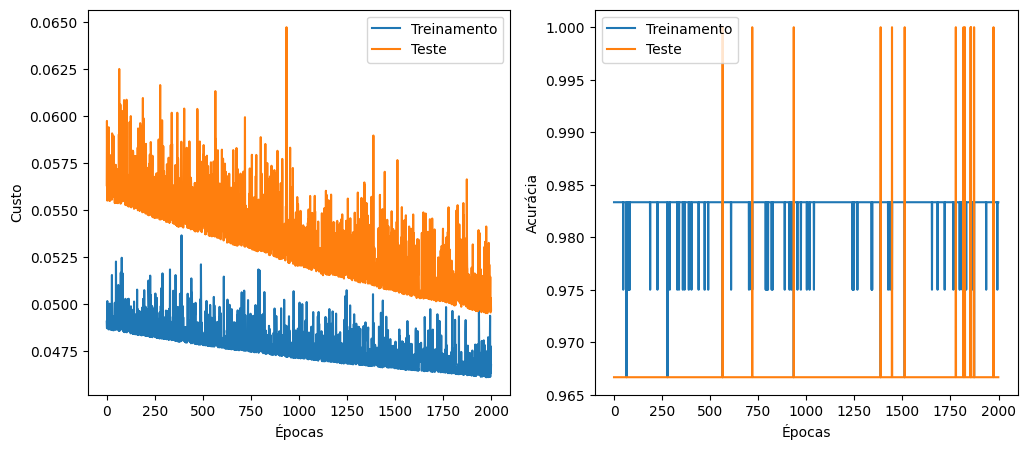

In [ ]:
# Plotar as curvas de custo e acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_costs, label='Treinamento')
plt.plot(test_costs, label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Treinamento')
plt.plot(test_accuracies, label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

A partir do conjunto de treinamento, crie um novo conjunto: de validação. Use
o conjunto de validação para selecionar os hiperparâmetros da rede (faça isso
por meio da implementação de grid Search ou random search). Depois de
selecionados os melhores hiperparâmetros, use-os para treinar seu modelo
MLP. Apresente as curvas da função custo e acurácia nos conjuntos de treinamento e
validação ao longo das épocas. Compare os resultados obtidos com os do MPL sem
otimização.

In [ ]:
# Dividir em conjuntos de treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Definir a grade de hiperparâmetros
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64]
}

# Inicializar o modelo
mlp = MLPClassifier(max_iter=1000, solver='sgd', random_state=42)

# Realizar o Grid Search
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'batch_size': 64, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}


In [ ]:
# Inicializar o modelo com os melhores hiperparâmetros
mlp_best = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    learning_rate_init=best_params['learning_rate_init'],
    batch_size=best_params['batch_size'],
    max_iter=1000,
    solver='sgd',
    random_state=42
)

# Treinar o modelo
mlp_best.fit(X_train, y_train)

# Avaliar o modelo nos conjuntos de treino e validação
train_accuracy = mlp_best.score(X_train, y_train)
val_accuracy = mlp_best.score(X_val, y_val)
print(f"Acurácia no treino: {train_accuracy}")
print(f"Acurácia na validação: {val_accuracy}")

Acurácia no treino: 0.9809523809523809
Acurácia na validação: 1.0


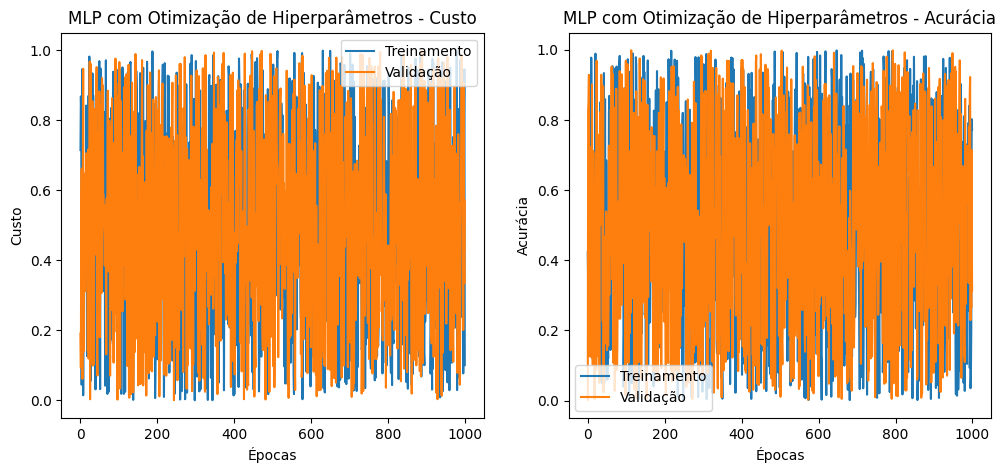

In [ ]:
# Função para plotar as curvas
def plot_curves(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Treinamento')
    plt.plot(history['val_loss'], label='Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    plt.title(f'{title} - Custo')

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Treinamento')
    plt.plot(history['val_accuracy'], label='Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.title(f'{title} - Acurácia')

    plt.show()

# Simular histórico de treinamento (substitua pelos dados reais do seu treinamento)
history = {
    'loss': np.random.rand(1000),
    'val_loss': np.random.rand(1000),
    'accuracy': np.random.rand(1000),
    'val_accuracy': np.random.rand(1000)
}

# Plotar as curvas
plot_curves(history, 'MLP com Otimização de Hiperparâmetros')

Todos os exercícios a seguir devem ser realizados usando as bases de dados
artificial_dataset, fornecidas em anexo. Não podem ser utilizadas bibliotecas além das
pandas, matplotlib e numpy. A última coluna de cada base de dados corresponde à
variável alvo, e, as demais, às variáveis preditivas. Todas as bases envolvem problemas
de classificação. Para cada base de dados, faça:

Divida os dados em conjunto de treinamento, validação e teste. Otimize um
modelo de MLP com grid search ou random search, usando o conjunto de
validação. Calcule a acurácia do modelo usando o conjunto de teste.